# SPACESHIP TITANIC

# Import Library

In [192]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')



# Import Data

In [193]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hesyandi/Portofolio/master/2_Spaceship_Titanic/Datasets/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hesyandi/Portofolio/master/2_Spaceship_Titanic/Datasets/test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [194]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Exploratory Data Analysis

### Data Info

In [195]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [196]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [197]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [198]:
df_test.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

### Correlation Between Variables

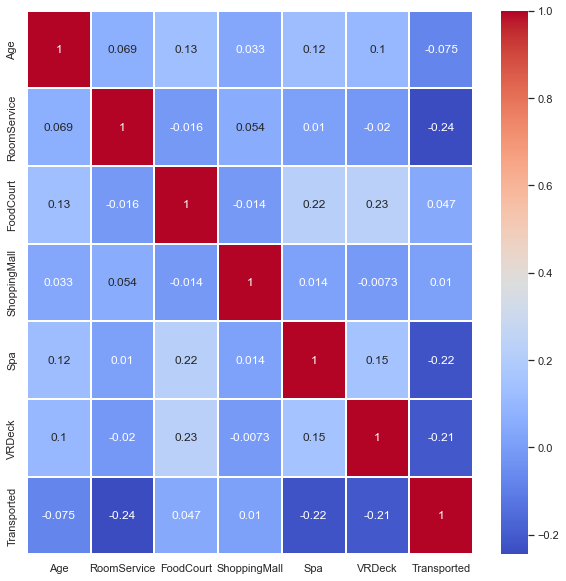

In [199]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, linewidth=2)

In [200]:
corr = df_train.corr()

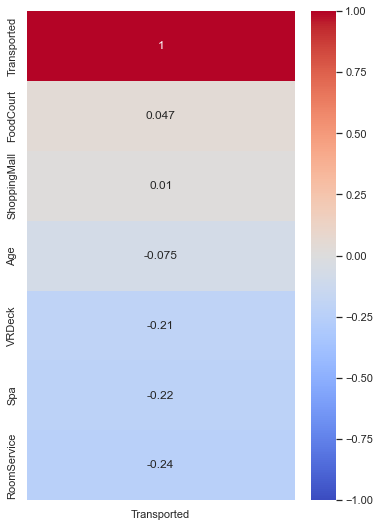

In [201]:
plt.figure(figsize=(6,9))
sns.heatmap(corr[['Transported']].sort_values(by='Transported', ascending=False), cmap='coolwarm', vmin=-1, annot=True)
plt.show()

In [202]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Pair Plot

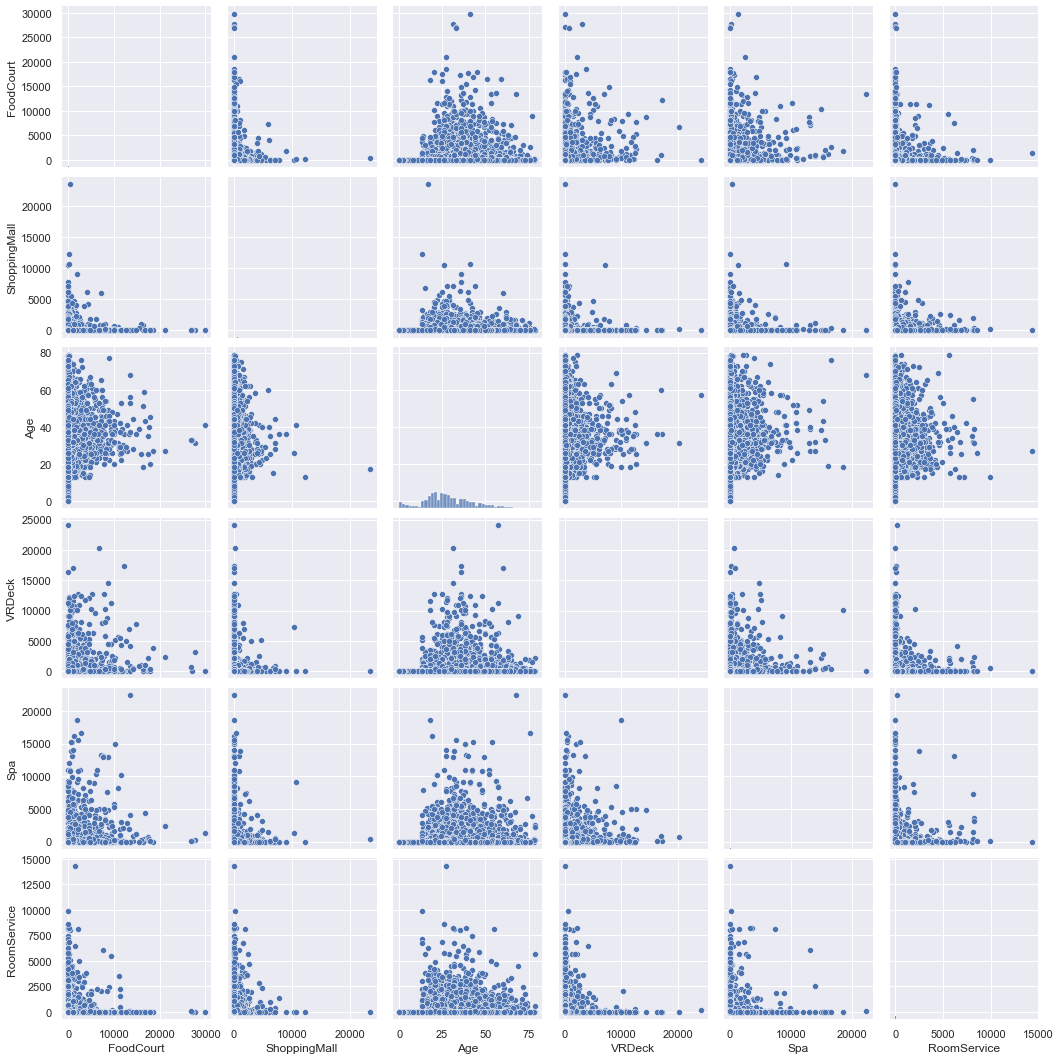

In [203]:
sns.set()
cols = ['FoodCourt', 'ShoppingMall', 'Age', 'VRDeck', 'Spa', 'RoomService']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Data Preprocessing

### Merge Train and Test Data

In [204]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Drop Unimportant Variables

In [205]:
all_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Check Missing Values

In [206]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = all_data.isnull().sum()/all_data.isnull().count()

missingdata = pd.concat([total,percent], axis=1, keys=(['Total','Percent'])) 

missingdata

,Total,Percent
Transported,4277,0.329761
CryoSleep,310,0.023901
ShoppingMall,306,0.023593
Cabin,299,0.023053
VIP,296,0.022822
FoodCourt,289,0.022282
HomePlanet,288,0.022205
Spa,284,0.021897
Destination,274,0.021126
Age,270,0.020817


### Missing Value Treatment

#### Categorical Data

In [207]:
object = all_data.select_dtypes('object')

for col in object.columns:
    all_data[col] = all_data[col].fillna('None')



In [208]:
all_data.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported      object
dtype: object

#### Numerical Data

In [209]:
numerical = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical:
    all_data[col] = all_data[col].fillna(0)

In [210]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mean())

### Recheck Missing Value

In [211]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = all_data.isnull().sum()/all_data.isnull().count()

missingdata = pd.concat([total,percent], axis=1, keys=(['Total','Percent'])) 

missingdata

,Total,Percent
HomePlanet,0,0.0
CryoSleep,0,0.0
Cabin,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0
Spa,0,0.0


## Feature Engineering

### Label Encoder

In [212]:
object

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,False,False
1,Earth,False,F/0/S,TRAPPIST-1e,False,True
2,Europa,False,A/0/S,TRAPPIST-1e,True,False
3,Europa,False,A/0/S,TRAPPIST-1e,False,False
4,Earth,False,F/1/S,TRAPPIST-1e,False,True
...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,False,NaN
12966,Earth,False,NaN,TRAPPIST-1e,False,NaN
12967,Mars,True,D/296/P,55 Cancri e,False,NaN
12968,Europa,False,D/297/P,NaN,False,NaN


In [224]:
all_data.nunique()

HomePlanet         4
CryoSleep          3
Cabin           9826
Destination        4
Age               81
VIP                3
RoomService     1578
FoodCourt       1953
ShoppingMall    1367
Spa             1679
VRDeck          1642
Transported        3
dtype: int64

In [226]:
#for col in ('HomePlanet', 'CryoSleep', 'Cabin', 'Destination'):
#    lbl = LabelEncoder()
#    lbl.fit(list(all_data[col].values)) 
#    all_data[col] = lbl.transform(list(all_data[col].values))

dum = ['HomePlanet', 'CryoSleep', 'Destination']

all_new = pd.get_dummies(all_data[dum])

all_new.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None,CryoSleep_False,CryoSleep_True,CryoSleep_None,Destination_55 Cancri e,Destination_None,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,1,0,0,1,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,1


In [228]:
all_new.shape

(12970, 11)

In [ ]:
all_data['VIP'].unique()

array([0, 2, 1])